In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import csv as csv


In [221]:
train = pd.read_csv('Training Data Set.csv')

In [222]:
train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [223]:
train.shape

(53515, 17)

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
Distance               52304 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           52076 non-null float64
body_type              4136 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


In [225]:
train.shape

(53515, 17)

In [226]:
test = pd.read_csv('Test Data Set.csv')

In [227]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [228]:
df['body_type'].value_counts()

compact    4548
van          10
Name: body_type, dtype: int64

In [121]:

df = pd.concat([train,test])

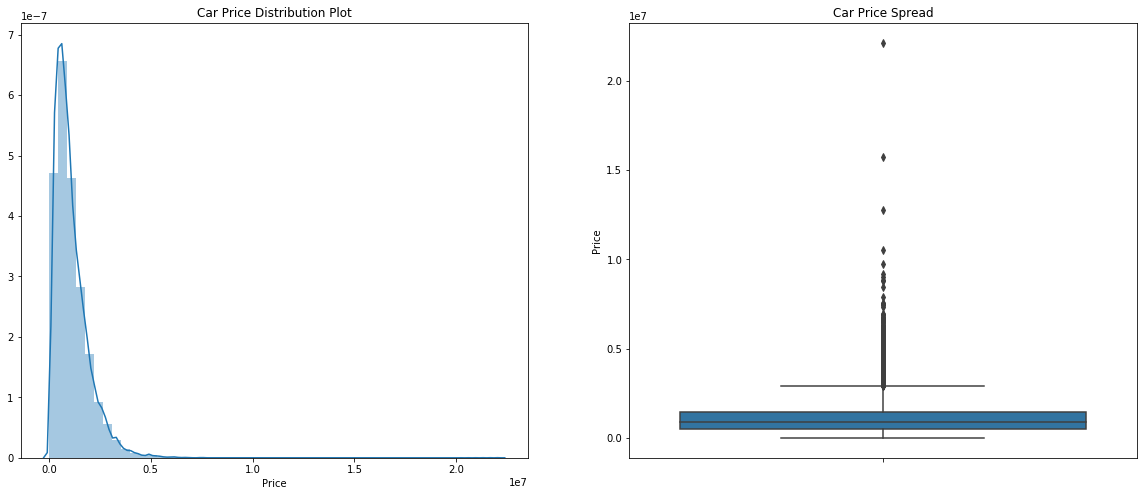

In [122]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(train.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=train.Price)

plt.show()

# Feature selection

by domain knowledge let's consider the following features
:
Distance <br>
Owner Type <br>
Age of the car <br>
Engine Displacement <br>
Engine Power <br>
Body type <br>
Vroom Audit Rating <br>
Transmission <br>
Door Count <br>
Seat Count <br>
Fuel Type 


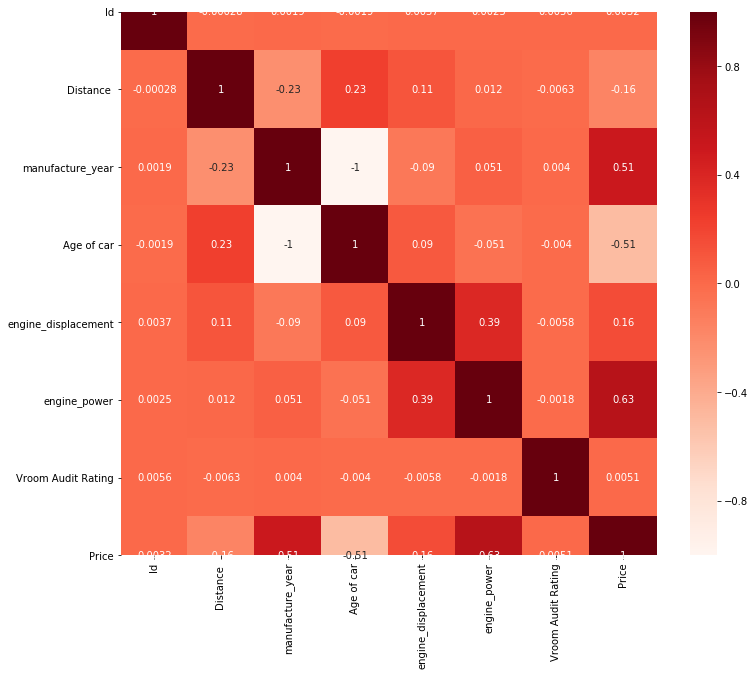

In [123]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Engine power has the highest correlation with price

# Visualising Categorical Data

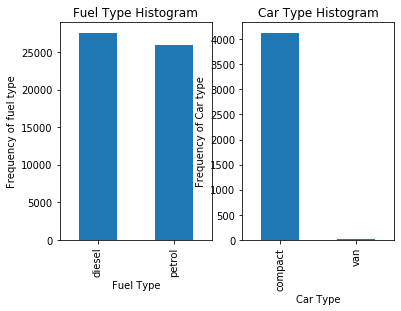

In [124]:
plt.subplot(1,2,1)
plt1 = train.fuel_type.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,2,2)
plt1 = train.body_type.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Inference : Diesel fuelled cars are more than Petrol <br>
Compact cars are more than Van

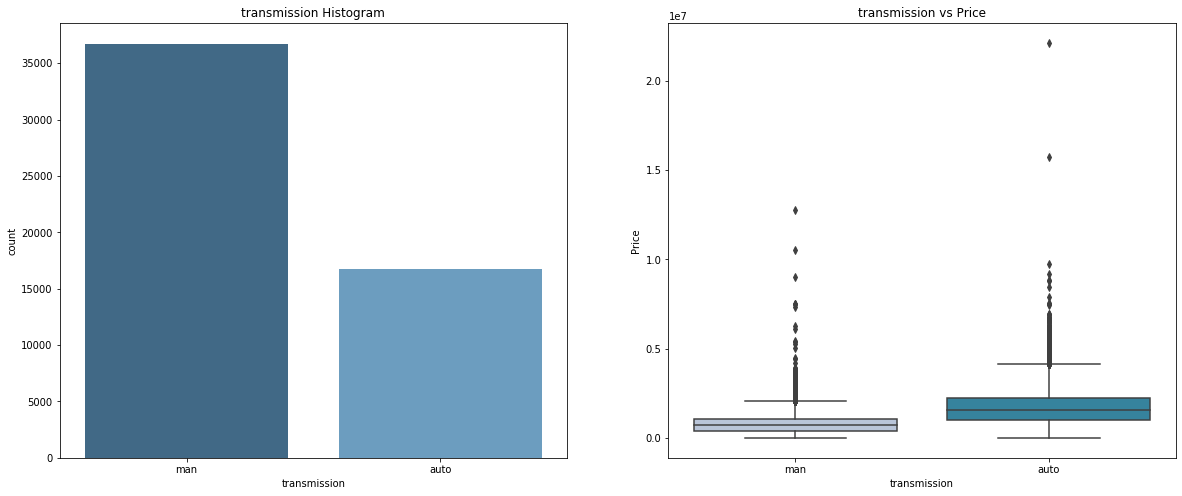

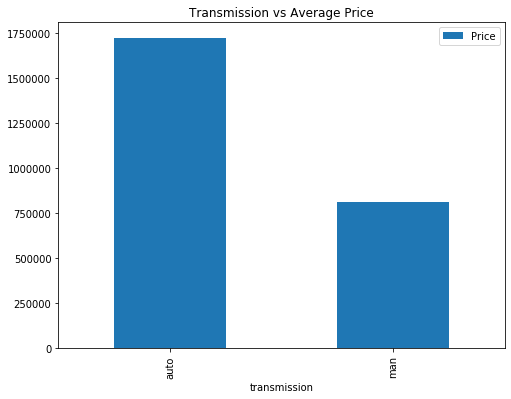

In [125]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('transmission Histogram')
sns.countplot(train.transmission, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('transmission vs Price')
sns.boxplot(x=train.transmission, y=df.Price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(train.groupby(['transmission'])['Price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Transmission vs Average Price')
plt.show()

Transmission seems to be an important Feature

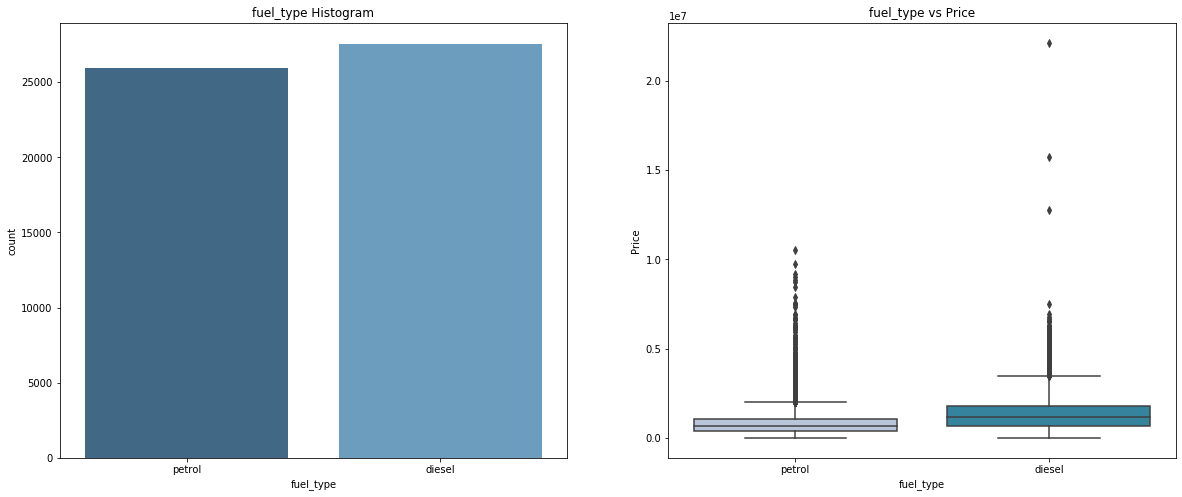

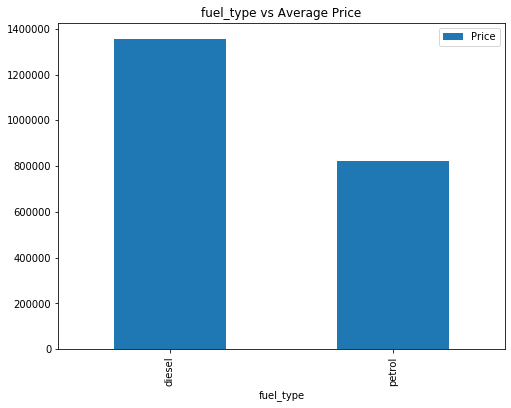

In [126]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('fuel_type Histogram')
sns.countplot(train.fuel_type, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('fuel_type vs Price')
sns.boxplot(x=train.fuel_type, y=df.Price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(train.groupby(['fuel_type'])['Price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('fuel_type vs Average Price')
plt.show()

Fuel type seems to be an important feature

In [127]:
df.columns

Index(['Age of car', 'Distance ', 'Id', 'Location', 'Maker', 'Owner Type',
       'Price', 'Vroom Audit Rating', 'body_type', 'door_count',
       'engine_displacement', 'engine_power', 'fuel_type', 'manufacture_year',
       'model', 'seat_count', 'transmission'],
      dtype='object')

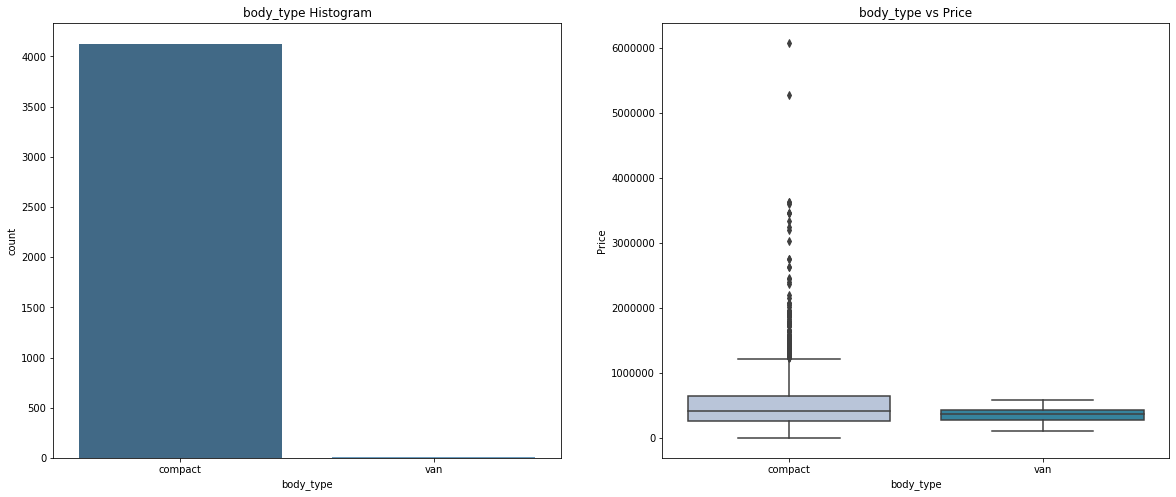

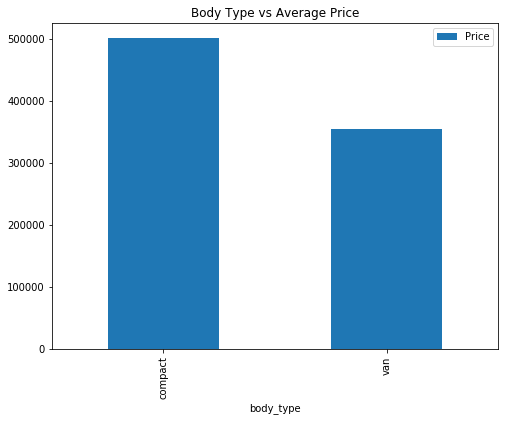

In [128]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('body_type Histogram')
sns.countplot(train.body_type, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('body_type vs Price')
sns.boxplot(x=train.body_type, y=df.Price, palette=("PuBuGn"))

plt.show()

df2 = pd.DataFrame(train.groupby(['body_type'])['Price'].mean().sort_values(ascending = False))
df2.plot.bar(figsize=(8,6))
plt.title('Body Type vs Average Price')
plt.show()

body type seems to be an important feature

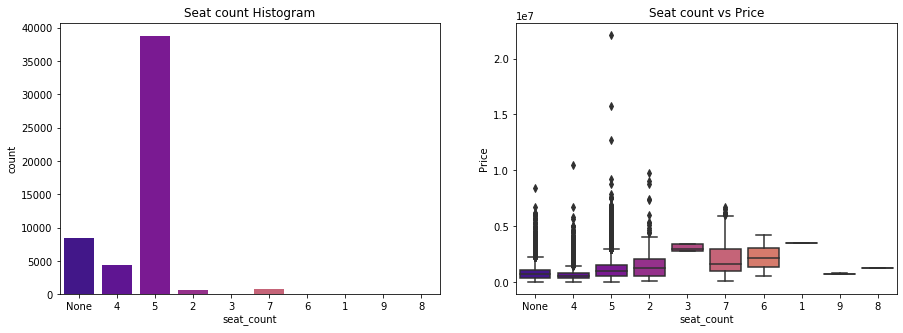

In [129]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seat count Histogram')
sns.countplot(train.seat_count, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Seat count vs Price')
sns.boxplot(x=train.seat_count, y=df.Price, palette=("plasma"))

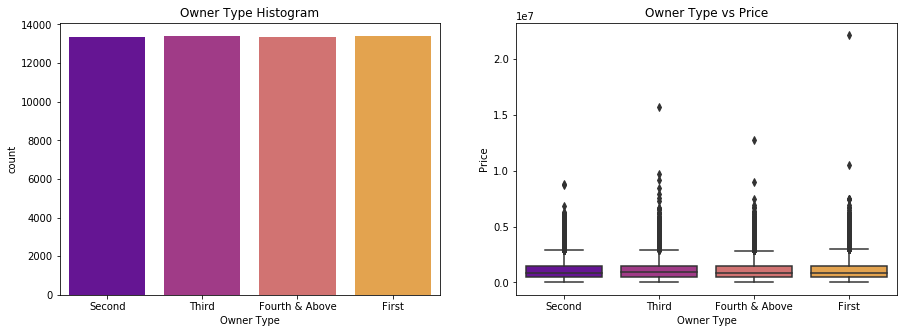

In [130]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Owner Type Histogram')
sns.countplot(train['Owner Type'], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Owner Type vs Price')
sns.boxplot(x=train['Owner Type'], y=df.Price, palette=("plasma"))

Owner Type doesnt have significant difference

# Visualisation of Numerical features

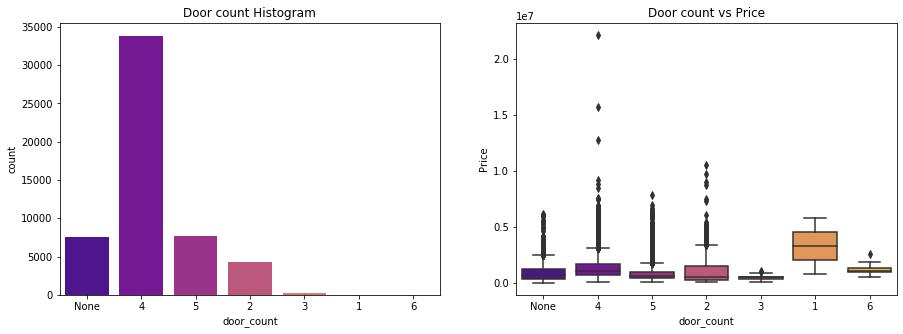

In [132]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door count Histogram')
sns.countplot(train.door_count, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door count vs Price')
sns.boxplot(x=train.door_count, y=df.Price, palette=("plasma"))

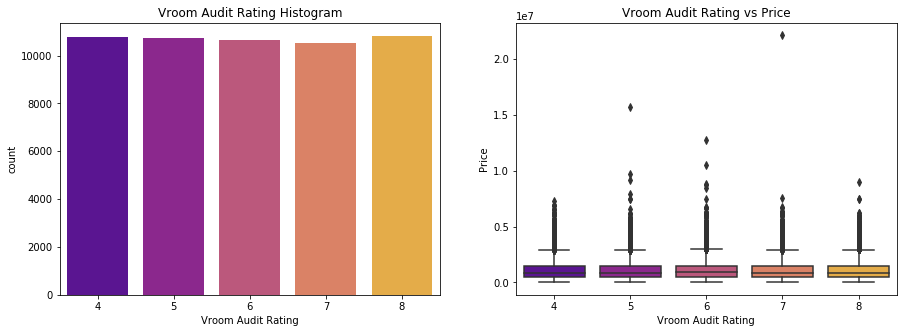

In [133]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Vroom Audit Rating Histogram')
sns.countplot(train['Vroom Audit Rating'], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Vroom Audit Rating vs Price')
sns.boxplot(x=train['Vroom Audit Rating'], y=df.Price, palette=("plasma"))

In [134]:
df.columns

Index(['Age of car', 'Distance ', 'Id', 'Location', 'Maker', 'Owner Type',
       'Price', 'Vroom Audit Rating', 'body_type', 'door_count',
       'engine_displacement', 'engine_power', 'fuel_type', 'manufacture_year',
       'model', 'seat_count', 'transmission'],
      dtype='object')

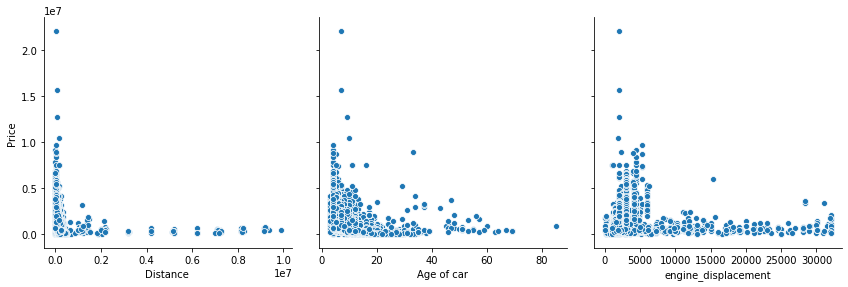

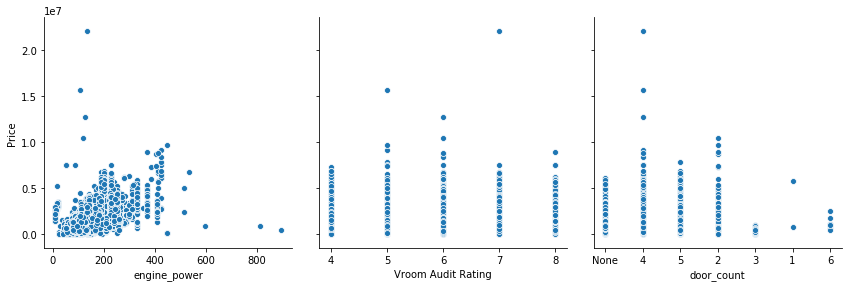

In [135]:
def pp(x,y,z):
    sns.pairplot(train, x_vars=[x,y,z], y_vars='Price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('Distance ', 'Age of car', 'engine_displacement')
pp('engine_power', 'Vroom Audit Rating', 'door_count')


engine power seem to have positive correlation with price

New features after visualisation: <br>

Age of the car <br>
Engine Power <br>
Body type <br>
Transmission <br>
Door count <br>
Seat count <br>
Fuel Type <br>


In [136]:
df.columns

Index(['Age of car', 'Distance ', 'Id', 'Location', 'Maker', 'Owner Type',
       'Price', 'Vroom Audit Rating', 'body_type', 'door_count',
       'engine_displacement', 'engine_power', 'fuel_type', 'manufacture_year',
       'model', 'seat_count', 'transmission'],
      dtype='object')

In [137]:
train['body_type'].value_counts()

compact    4127
van           9
Name: body_type, dtype: int64

In [229]:
data = train[['Location','manufacture_year','model','Maker','Vroom Audit Rating','Owner Type','Distance ','engine_power','transmission','door_count','seat_count','fuel_type','Price','engine_displacement']]

In [230]:
data

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,Price,engine_displacement
0,Ahmedabad,1964,octavia,skoda,8,Second,NaN,147.0,man,None,None,petrol,543764.25,1964
1,Ahmedabad,2012,panda,fiat,6,Third,27750.0,51.0,man,4,4,petrol,401819.25,1242
2,Hyderabad,2014,x1,bmw,7,Third,46000.0,105.0,auto,4,5,diesel,2392855.50,1995
3,Mumbai,2011,juke,nissan,7,Third,43949.0,140.0,man,4,5,petrol,958606.50,1618
4,Jaipur,2012,x5,bmw,7,Fourth & Above,59524.0,180.0,auto,4,5,diesel,3085561.50,2993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,Delhi,2014,octavia,skoda,4,Fourth & Above,29334.0,77.0,man,4,5,diesel,1342996.50,1598
53511,Bangalore,2009,octavia,skoda,8,Fourth & Above,223631.0,77.0,man,5,5,diesel,510732.75,1900
53512,Pune,2015,x1,bmw,4,Third,25500.0,105.0,auto,4,5,diesel,2008123.50,1995
53513,Jaipur,2011,avensis,toyota,5,Third,1195500.0,93.0,man,None,None,diesel,874352.25,11950


In [231]:
data.isnull().sum()

Location                  0
manufacture_year          0
model                     0
Maker                     0
Vroom Audit Rating        0
Owner Type                0
Distance               1211
engine_power           1439
transmission              0
door_count                0
seat_count                0
fuel_type                 0
Price                     0
engine_displacement       0
dtype: int64

In [232]:
data.isna().any()[lambda x: x]

Distance        True
engine_power    True
dtype: bool

In [233]:
data['door_count'].replace('None', np.nan, inplace=True)

In [234]:
data['seat_count'].replace('None', np.nan, inplace=True)

In [235]:
data.isna().any()[lambda x: x]

Distance        True
engine_power    True
door_count      True
seat_count      True
dtype: bool

In [236]:
data['engine_power'].median()

91.0

In [237]:
data['Distance '].median()

65520.0

In [238]:
data['engine_power'].fillna((data['engine_power'].median()), inplace=True)

In [239]:
data['Distance '].fillna((data['Distance '].median()), inplace=True)

In [240]:
data.head()

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,Price,engine_displacement
0,Ahmedabad,1964,octavia,skoda,8,Second,65520.0,147.0,man,NaN,NaN,petrol,543764.25,1964
1,Ahmedabad,2012,panda,fiat,6,Third,27750.0,51.0,man,4,4,petrol,401819.25,1242
2,Hyderabad,2014,x1,bmw,7,Third,46000.0,105.0,auto,4,5,diesel,2392855.50,1995
3,Mumbai,2011,juke,nissan,7,Third,43949.0,140.0,man,4,5,petrol,958606.50,1618
4,Jaipur,2012,x5,bmw,7,Fourth & Above,59524.0,180.0,auto,4,5,diesel,3085561.50,2993


In [241]:
data['Price'].fillna((data['Price'].median()), inplace=True)

In [242]:
data.head()

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,Price,engine_displacement
0,Ahmedabad,1964,octavia,skoda,8,Second,65520.0,147.0,man,NaN,NaN,petrol,543764.25,1964
1,Ahmedabad,2012,panda,fiat,6,Third,27750.0,51.0,man,4,4,petrol,401819.25,1242
2,Hyderabad,2014,x1,bmw,7,Third,46000.0,105.0,auto,4,5,diesel,2392855.50,1995
3,Mumbai,2011,juke,nissan,7,Third,43949.0,140.0,man,4,5,petrol,958606.50,1618
4,Jaipur,2012,x5,bmw,7,Fourth & Above,59524.0,180.0,auto,4,5,diesel,3085561.50,2993


In [243]:
data.isna().any()[lambda x: x]

door_count    True
seat_count    True
dtype: bool

In [244]:
data['door_count'].mode()

0    4
dtype: object

In [245]:
data['seat_count'].mode()

0    5
dtype: object

In [246]:
data.head()

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,Price,engine_displacement
0,Ahmedabad,1964,octavia,skoda,8,Second,65520.0,147.0,man,NaN,NaN,petrol,543764.25,1964
1,Ahmedabad,2012,panda,fiat,6,Third,27750.0,51.0,man,4,4,petrol,401819.25,1242
2,Hyderabad,2014,x1,bmw,7,Third,46000.0,105.0,auto,4,5,diesel,2392855.50,1995
3,Mumbai,2011,juke,nissan,7,Third,43949.0,140.0,man,4,5,petrol,958606.50,1618
4,Jaipur,2012,x5,bmw,7,Fourth & Above,59524.0,180.0,auto,4,5,diesel,3085561.50,2993


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 14 columns):
Location               53515 non-null object
manufacture_year       53515 non-null int64
model                  53515 non-null object
Maker                  53515 non-null object
Vroom Audit Rating     53515 non-null int64
Owner Type             53515 non-null object
Distance               53515 non-null float64
engine_power           53515 non-null float64
transmission           53515 non-null object
door_count             45981 non-null object
seat_count             45004 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
engine_displacement    53515 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 5.7+ MB


In [248]:
 data['door_count'] = data['door_count'].fillna(0)

In [249]:
 data['seat_count'] = data['seat_count'].fillna(0)

In [250]:
data['door_count'].astype(int)

0        0
1        4
2        4
3        4
4        4
        ..
53510    4
53511    5
53512    4
53513    0
53514    5
Name: door_count, Length: 53515, dtype: int64

In [251]:
data['seat_count'].astype(int)

0        0
1        4
2        5
3        5
4        5
        ..
53510    5
53511    5
53512    5
53513    0
53514    5
Name: seat_count, Length: 53515, dtype: int64

In [252]:
data

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,Price,engine_displacement
0,Ahmedabad,1964,octavia,skoda,8,Second,65520.0,147.0,man,0,0,petrol,543764.25,1964
1,Ahmedabad,2012,panda,fiat,6,Third,27750.0,51.0,man,4,4,petrol,401819.25,1242
2,Hyderabad,2014,x1,bmw,7,Third,46000.0,105.0,auto,4,5,diesel,2392855.50,1995
3,Mumbai,2011,juke,nissan,7,Third,43949.0,140.0,man,4,5,petrol,958606.50,1618
4,Jaipur,2012,x5,bmw,7,Fourth & Above,59524.0,180.0,auto,4,5,diesel,3085561.50,2993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,Delhi,2014,octavia,skoda,4,Fourth & Above,29334.0,77.0,man,4,5,diesel,1342996.50,1598
53511,Bangalore,2009,octavia,skoda,8,Fourth & Above,223631.0,77.0,man,5,5,diesel,510732.75,1900
53512,Pune,2015,x1,bmw,4,Third,25500.0,105.0,auto,4,5,diesel,2008123.50,1995
53513,Jaipur,2011,avensis,toyota,5,Third,1195500.0,93.0,man,0,0,diesel,874352.25,11950


In [253]:
data['door_count'].replace(to_replace = 0,value = data['door_count'].mode(), inplace=True)

In [254]:
data['seat_count'].replace(to_replace = 0,value = data['seat_count'].mode(), inplace=True)

In [255]:
data.head()

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,Price,engine_displacement
0,Ahmedabad,1964,octavia,skoda,8,Second,65520.0,147.0,man,4,5,petrol,543764.25,1964
1,Ahmedabad,2012,panda,fiat,6,Third,27750.0,51.0,man,4,4,petrol,401819.25,1242
2,Hyderabad,2014,x1,bmw,7,Third,46000.0,105.0,auto,4,5,diesel,2392855.50,1995
3,Mumbai,2011,juke,nissan,7,Third,43949.0,140.0,man,4,5,petrol,958606.50,1618
4,Jaipur,2012,x5,bmw,7,Fourth & Above,59524.0,180.0,auto,4,5,diesel,3085561.50,2993


In [256]:
data.isna().any()[lambda x: x]

Series([], dtype: bool)

In [257]:
data=pd.get_dummies(data=data,columns=[ 'transmission','fuel_type'],drop_first=True)

In [258]:
from sklearn.preprocessing import LabelEncoder

In [259]:
data['Owner Type'] = LabelEncoder().fit_transform(data['Owner Type'].tolist())

In [260]:
data['Maker'] = LabelEncoder().fit_transform(data['Maker'].tolist())

In [261]:
data['model'] = LabelEncoder().fit_transform(data['model'].tolist())

In [262]:
data['Location'] = LabelEncoder().fit_transform(data['Location'].tolist())

In [263]:
data

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,door_count,seat_count,Price,engine_displacement,transmission_man,fuel_type_petrol
0,0,1964,8,6,8,2,65520.0,147.0,4,5,543764.25,1964,1,1
1,0,2012,9,2,6,3,27750.0,51.0,4,4,401819.25,1242,1,1
2,5,2014,18,1,7,3,46000.0,105.0,4,5,2392855.50,1995,0,0
3,9,2011,6,5,7,3,43949.0,140.0,4,5,958606.50,1618,1,1
4,6,2012,20,1,7,1,59524.0,180.0,4,5,3085561.50,2993,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,4,2014,8,6,4,1,29334.0,77.0,4,5,1342996.50,1598,1,0
53511,1,2009,8,6,8,1,223631.0,77.0,5,5,510732.75,1900,1,0
53512,10,2015,18,1,4,3,25500.0,105.0,4,5,2008123.50,1995,0,0
53513,6,2011,1,7,5,3,1195500.0,93.0,0,0,874352.25,11950,1,0


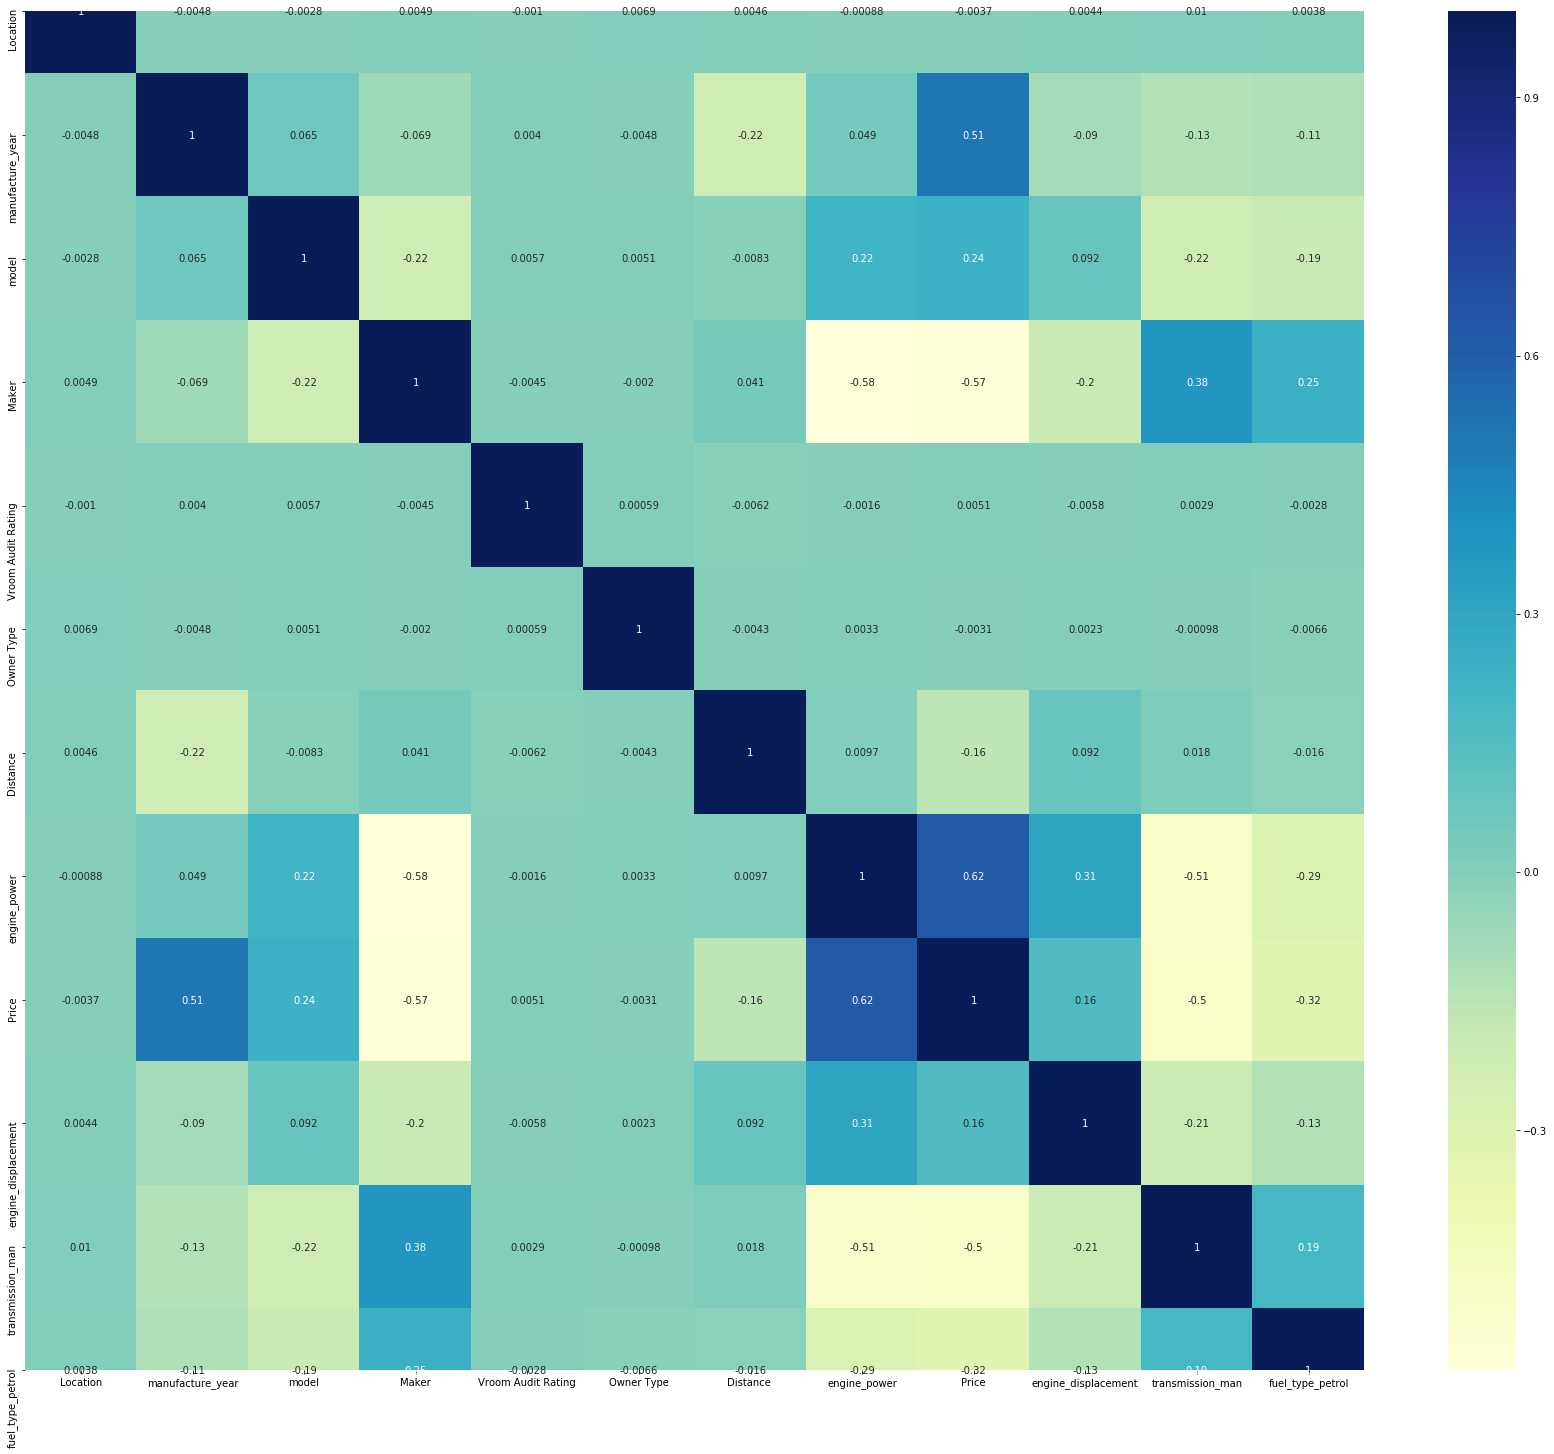

In [264]:
plt.figure(figsize = (30, 25))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [265]:
X = data.drop(['Price'],axis =1)
y= data['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) 

LinearRegression()

In [266]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 4.02892657e+02  7.90603038e+04  4.14767144e+03 -8.05344878e+04
  1.29745721e+03 -2.77058898e+03 -1.62636863e-01  6.75853156e+03
 -4.23127984e+04  3.13611708e+04  1.42836858e+00 -2.59868495e+05
 -1.23185578e+05]
Intercept: -157963309.04473734
R^2 score: 0.6968482937044175


In [267]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(37460, 13)
(16055, 13)
(16055,)


In [268]:
data.head()

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,door_count,seat_count,Price,engine_displacement,transmission_man,fuel_type_petrol
0,0,1964,8,6,8,2,65520.0,147.0,4,5,543764.25,1964,1,1
1,0,2012,9,2,6,3,27750.0,51.0,4,4,401819.25,1242,1,1
2,5,2014,18,1,7,3,46000.0,105.0,4,5,2392855.50,1995,0,0
3,9,2011,6,5,7,3,43949.0,140.0,4,5,958606.50,1618,1,1
4,6,2012,20,1,7,1,59524.0,180.0,4,5,3085561.50,2993,0,0


In [269]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [270]:
est = sm.OLS(y, X.astype(float)).fit()

In [271]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant.astype(float)).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     9460.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        07:01:02   Log-Likelihood:            -7.7427e+05
No. Observations:               53515   AIC:                         1.549e+06
Df Residuals:                   53501   BIC:                         1.549e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.58e+08   9.13e+05   -172.932      0.000    -1.6e+08   -1.56e+08
Location              402.8927    636.578      0.633      0.527    -844.806    1650.591
manufacture_year     7.906e+04    453.953    174.160      0.000    7.82e+04       8e+04
model                4147.6714    341.628     12.141      0.000    3478.078    4817.265
Maker               -8.053e+04    988.037    -81.510      0.000   -8.25e+04   -7.86e+04
Vroom Audit Rating   1297.4572   1416.899      0.916      0.360   -1479.676    4074.591
Owner Type          -2770.5890   1796.279     -1.542      0.123   -6291.310     750.132
Distance               -0.1626      0.008    -21.349      0.000      -0.178      -0.148
engine_power         6758.5316     62.157    108.733      0.000    6636.703    6880.360
door_count          -4.231e+04   1661.020    -25.474      0.000   -4.56e+04   -3.91e+04
seat_count           3.136e+04   1362.753     23.013      0.000    2.87e+04     3.4e+04
engine_displacement     1.4284      1.457      0.980      0.327      -1.427       4.284
transmission_man    -2.599e+05   5159.287    -50.369      0.000    -2.7e+05    -2.5e+05
fuel_type_petrol    -1.232e+05   4340.570    -28.380      0.000   -1.32e+05   -1.15e+05
==============================================================================
Omnibus:                    56111.094   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26144009.212
Skew:                           4.571   Prob(JB):                         0.00
Kurtosis:                     110.895   Cond. No.                     1.31e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

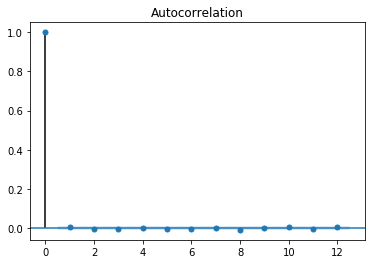

In [181]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=12 , alpha=0.05)
acf.show()

In [182]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(26144009.211868484, 0.0)


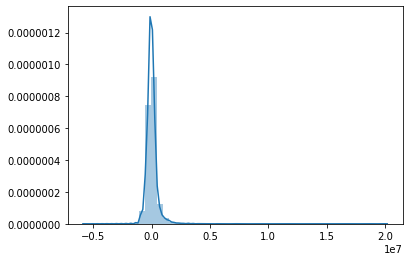

In [183]:
import seaborn as sns

sns.distplot(lin_reg.resid)

In [78]:
X

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,door_count,seat_count,engine_displacement,transmission_man,fuel_type_petrol
0,0,1964,8,6,8,2,65520.0,147.0,4,5,1964,1,1
1,0,2012,9,2,6,3,27750.0,51.0,4,4,1242,1,1
2,5,2014,18,1,7,3,46000.0,105.0,4,5,1995,0,0
3,9,2011,6,5,7,3,43949.0,140.0,4,5,1618,1,1
4,6,2012,20,1,7,1,59524.0,180.0,4,5,2993,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,4,2014,8,6,4,1,29334.0,77.0,4,5,1598,1,0
53511,1,2009,8,6,8,1,223631.0,77.0,5,5,1900,1,0
53512,10,2015,18,1,4,3,25500.0,105.0,4,5,1995,0,0
53513,6,2011,1,7,5,3,1195500.0,93.0,0,0,11950,1,0


In [79]:
test.shape

(5615, 16)

In [184]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [272]:
test1 = test[['Location','manufacture_year','model','Maker','Vroom Audit Rating','Owner Type','Distance ','engine_power','transmission','door_count','seat_count','fuel_type','engine_displacement']]

In [273]:
test1

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,engine_displacement
0,Mumbai,2007,octavia,skoda,5,First,150000.0,75.0,man,4,5,petrol,1595
1,Coimbatore,2014,rapid,skoda,4,Third,29376.0,77.0,man,4,5,diesel,1598
2,Coimbatore,2014,octavia,skoda,5,Second,30563.0,110.0,man,5,5,diesel,1968
3,Delhi,2015,q3,audi,8,Fourth & Above,8650.0,110.0,auto,4,5,diesel,1968
4,Chennai,2015,tt,audi,4,Third,6400.0,169.0,auto,2,None,petrol,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,Mumbai,2011,octavia,skoda,8,First,149976.0,103.0,man,4,5,diesel,1968
5611,Ahmedabad,2005,superb,skoda,6,First,332000.0,96.0,man,4,5,diesel,1896
5612,Bangalore,2005,octavia,skoda,7,Second,230800.0,77.0,man,5,5,diesel,1896
5613,Jaipur,2011,qashqai,nissan,5,Third,63480.0,104.0,man,4,7,petrol,1997


In [274]:
test1.isnull().sum()

Location                 0
manufacture_year         0
model                    0
Maker                    0
Vroom Audit Rating       0
Owner Type               0
Distance               128
engine_power           168
transmission             0
door_count               0
seat_count               0
fuel_type                0
engine_displacement      0
dtype: int64

In [275]:
test1['door_count'].replace('None', np.nan, inplace=True)

In [276]:
test1['seat_count'].replace('None', np.nan, inplace=True)

In [277]:
test1.isna().any()[lambda x: x]

Distance        True
engine_power    True
door_count      True
seat_count      True
dtype: bool

In [278]:
test1['engine_power'].median()

88.0

In [279]:
test1['Distance '].median()

64000.0

In [280]:
test1['engine_power'].fillna((test1['engine_power'].median()), inplace=True)

In [281]:
test1['Distance '].fillna((test1['Distance '].median()), inplace=True)

In [282]:
test1.isna().any()[lambda x: x]

door_count    True
seat_count    True
dtype: bool

In [283]:
test1['engine_power'].median()

88.0

In [284]:
test1['engine_power'].fillna((test1['engine_power'].median()),inplace =True)

In [285]:
test1.isna().any()[lambda x: x]

door_count    True
seat_count    True
dtype: bool

In [286]:
test1

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,transmission,door_count,seat_count,fuel_type,engine_displacement
0,Mumbai,2007,octavia,skoda,5,First,150000.0,75.0,man,4,5,petrol,1595
1,Coimbatore,2014,rapid,skoda,4,Third,29376.0,77.0,man,4,5,diesel,1598
2,Coimbatore,2014,octavia,skoda,5,Second,30563.0,110.0,man,5,5,diesel,1968
3,Delhi,2015,q3,audi,8,Fourth & Above,8650.0,110.0,auto,4,5,diesel,1968
4,Chennai,2015,tt,audi,4,Third,6400.0,169.0,auto,2,NaN,petrol,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,Mumbai,2011,octavia,skoda,8,First,149976.0,103.0,man,4,5,diesel,1968
5611,Ahmedabad,2005,superb,skoda,6,First,332000.0,96.0,man,4,5,diesel,1896
5612,Bangalore,2005,octavia,skoda,7,Second,230800.0,77.0,man,5,5,diesel,1896
5613,Jaipur,2011,qashqai,nissan,5,Third,63480.0,104.0,man,4,7,petrol,1997


In [287]:
test1['door_count'] = test1['door_count'].fillna(0)

In [288]:
test1['seat_count'] = test1['seat_count'].fillna(0)

In [289]:
test1['door_count'].astype(int)

0       4
1       4
2       5
3       4
4       2
       ..
5610    4
5611    4
5612    5
5613    4
5614    0
Name: door_count, Length: 5615, dtype: int64

In [290]:
test1['seat_count'].astype(int)

0       5
1       5
2       5
3       5
4       0
       ..
5610    5
5611    5
5612    5
5613    7
5614    0
Name: seat_count, Length: 5615, dtype: int64

In [291]:
test1['door_count'].replace(to_replace = 0, value = test1['door_count'].mode(),inplace = True)

In [292]:
test1['seat_count'].replace(to_replace = 0, value = test1['seat_count'].mode(),inplace = True)

In [293]:
test1.isna().any()[lambda x: x]

Series([], dtype: bool)

In [294]:
test1=pd.get_dummies(data=test1,columns=[ 'transmission','fuel_type'],drop_first=True)

In [295]:
test1

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,door_count,seat_count,engine_displacement,transmission_man,fuel_type_petrol
0,Mumbai,2007,octavia,skoda,5,First,150000.0,75.0,4,5,1595,1,1
1,Coimbatore,2014,rapid,skoda,4,Third,29376.0,77.0,4,5,1598,1,0
2,Coimbatore,2014,octavia,skoda,5,Second,30563.0,110.0,5,5,1968,1,0
3,Delhi,2015,q3,audi,8,Fourth & Above,8650.0,110.0,4,5,1968,0,0
4,Chennai,2015,tt,audi,4,Third,6400.0,169.0,2,0,1984,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,Mumbai,2011,octavia,skoda,8,First,149976.0,103.0,4,5,1968,1,0
5611,Ahmedabad,2005,superb,skoda,6,First,332000.0,96.0,4,5,1896,1,0
5612,Bangalore,2005,octavia,skoda,7,Second,230800.0,77.0,5,5,1896,1,0
5613,Jaipur,2011,qashqai,nissan,5,Third,63480.0,104.0,4,7,1997,1,1


In [296]:
test1['Owner Type'] = LabelEncoder().fit_transform(test1['Owner Type'].tolist())

In [297]:
test1

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,door_count,seat_count,engine_displacement,transmission_man,fuel_type_petrol
0,Mumbai,2007,octavia,skoda,5,0,150000.0,75.0,4,5,1595,1,1
1,Coimbatore,2014,rapid,skoda,4,3,29376.0,77.0,4,5,1598,1,0
2,Coimbatore,2014,octavia,skoda,5,2,30563.0,110.0,5,5,1968,1,0
3,Delhi,2015,q3,audi,8,1,8650.0,110.0,4,5,1968,0,0
4,Chennai,2015,tt,audi,4,3,6400.0,169.0,2,0,1984,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,Mumbai,2011,octavia,skoda,8,0,149976.0,103.0,4,5,1968,1,0
5611,Ahmedabad,2005,superb,skoda,6,0,332000.0,96.0,4,5,1896,1,0
5612,Bangalore,2005,octavia,skoda,7,2,230800.0,77.0,5,5,1896,1,0
5613,Jaipur,2011,qashqai,nissan,5,3,63480.0,104.0,4,7,1997,1,1


In [298]:
test1['Maker'] = LabelEncoder().fit_transform(test1['Maker'].tolist())

In [299]:
test1['model'] = LabelEncoder().fit_transform(test1['model'].tolist())

In [300]:
test1['Location'] = LabelEncoder().fit_transform(test1['Location'].tolist())

In [301]:
test1

,Location,manufacture_year,model,Maker,Vroom Audit Rating,Owner Type,Distance,engine_power,door_count,seat_count,engine_displacement,transmission_man,fuel_type_petrol
0,9,2007,8,6,5,0,150000.0,75.0,4,5,1595,1,1
1,3,2014,14,6,4,3,29376.0,77.0,4,5,1598,1,0
2,3,2014,8,6,5,2,30563.0,110.0,5,5,1968,1,0
3,4,2015,10,0,8,1,8650.0,110.0,4,5,1968,0,0
4,2,2015,17,0,4,3,6400.0,169.0,2,0,1984,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,9,2011,8,6,8,0,149976.0,103.0,4,5,1968,1,0
5611,0,2005,16,6,6,0,332000.0,96.0,4,5,1896,1,0
5612,1,2005,8,6,7,2,230800.0,77.0,5,5,1896,1,0
5613,6,2011,13,5,5,3,63480.0,104.0,4,7,1997,1,1


In [302]:
test1.shape

(5615, 13)

In [303]:
X.shape

(53515, 13)

In [304]:
prediction = lin_reg.predict(test1)

ValueError: shapes (5615,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)

In [116]:
 pd.DataFrame( { "Unique Id":test.Id,"Price" : prediction} ).to_csv("hackathon14.csv", index = False)

NameError: name 'prediction' is not defined